
# Описание проекта
**Предстоит открыть небольшое кафе в Москве где гостей должны обслуживать роботы.  Сдедует подготовить исследование рынка. Есть открытые данные о заведениях общественного питания в Москве.**




# Загрузка и обработка данных.
Загрузим данные о заведениях общественного питания Москвы и подготовим их к анализу.

In [77]:
# загрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns

In [78]:
# сохраним данные в переменной rest_data
try:
    rest_data = pd.read_csv('\\Users\\VladimiRUS_74RU\\Desktop\\data anaiysis\\rest_data.csv')
except:
    rest_data = pd.read_csv('/datasets/rest_data.csv')


In [79]:
# выведем на экран первые 5 строк
display(rest_data.head())

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [80]:
# выведем общую информацию
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [81]:
# проверим наличие дубликатов
rest_data.duplicated().sum()

0

In [83]:
# проверим наличие дубликатов в колонке object_name
rest_data['object_name'].duplicated().sum()


4973

In [84]:
# выведем на экран названия заведений
rest_data['object_name'].value_counts()

Столовая                   267
Кафе                       236
Шаурма                     234
KFC                        155
Шоколадница                142
                          ... 
Грузинский домик             1
Кафе «Лаборатория»           1
Кафе Бар Бульвар             1
Torro Grill                  1
Кальянная «Мята launge»      1
Name: object_name, Length: 10393, dtype: int64

In [85]:
# приведём названия к одному регистру
rest_data['object_name'] = rest_data['object_name'].str.upper() 

# проверим наличие дубликатов в колонке object_name
rest_data['object_name'].duplicated().sum()

5442

In [86]:
# выведем на экран названия заведений
print(rest_data['object_name'].value_counts())
#  посчитаем количество уникальных значений колонки 
print('количество уникальных значений названий заведений:',rest_data['object_name']\
      .value_counts().count())


СТОЛОВАЯ                             321
КАФЕ                                 278
ШАУРМА                               250
ШОКОЛАДНИЦА                          158
KFC                                  155
                                    ... 
КАФЕ «PHO»                             1
ГБОУ ГОРОДА МОСКВЫ «ШКОЛА № 2057»      1
МАНКА                                  1
ШКОЛА 416                              1
РИО ГРАНДЭ                             1
Name: object_name, Length: 9924, dtype: int64
количество уникальных значений названий заведений: 9924


In [87]:
# проверим наличие дубликатов в колонке chain
rest_data['chain'].duplicated().sum()

15364

In [88]:
# выведем на экран уникальные  значения и количество chain
rest_data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64

In [89]:
# проверим наличие дубликатов в колонке object_type
rest_data['object_type'].duplicated().sum()

15357

In [90]:
# выведем на экран уникальные  значения и количество
rest_data['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [91]:
# проверим наличие дубликатов в колонке object_type
rest_data['chain'].duplicated().sum()

15364

In [92]:
# выведем на экран уникальные  значения и количество
rest_data['chain'].value_counts()

нет    12398
да      2968
Name: chain, dtype: int64


Дубликаты наименований приведены к единому регистру, после обработки количество дубликатов увеличилось с 4973 до 5442, т.е 469 наименований отличались только регистром. Дубликаты в колонке с наименованиями могут быть связаны как с сетевым типом заведений , так и обычным совпадением. Поэтому оставим их без изменений. Количество дубликатов в остальных колонках объяснимо самой природой данных.


# Анализ данных.


## Исследование соотношения видов объектов общественного питания по количеству. Построение графика.

In [93]:
# сохраним в переменной rest_data_pie необходимые для анализа данные
rest_data_pie = rest_data.groupby(['object_type']).count().reset_index(0).sort_values(by=['object_name']
                                                                                     ,ascending=False)
# выведем на экран rest_data_pie
display(rest_data_pie)

,object_type,id,object_name,chain,address,number
3,кафе,6099,6099,6099,6099,6099
8,столовая,2587,2587,2587,2587,2587
7,ресторан,2285,2285,2285,2285,2285
6,предприятие быстрого обслуживания,1923,1923,1923,1923,1923
0,бар,856,856,856,856,856
1,буфет,585,585,585,585,585
4,кафетерий,398,398,398,398,398
2,закусочная,360,360,360,360,360
5,магазин (отдел кулинарии),273,273,273,273,273


In [94]:
# построим график
from plotly import graph_objects as go

labels = rest_data_pie['object_type']
values = rest_data_pie['object_name']

fig = go.Figure(data=[go.Pie(labels=labels, values=values
                             ,title='Соотношение видов объектов общественного питания по количеству')])
fig.show()


*Промежуточный вывод*

 В результате исследования соотношения видов объектов общественного питания по количеству установлено, что подавляющее большинство объектов 39,7 % относятся к кафе, следующий в рейтинге -столовые 16,8 %, рестораны третьи по количеству-14,9%, предприятие быстрого обслуживания -12,5%. Доли остальных заведений не превышают 7%.


## Исследование соотношения сетевых и несетевых заведений по количеству. Построение графика.

In [95]:
# сохраним в переменной rest_data_chain необходимые данные
rest_data_chain = rest_data.groupby(['chain']).count().reset_index(0).sort_values(by=['object_name']
                                                                                     ,ascending=False)
# выведем на печать rest_data_chain
display(rest_data_chain)

,chain,id,object_name,object_type,address,number
1,нет,12398,12398,12398,12398,12398
0,да,2968,2968,2968,2968,2968


In [96]:
# посторим график
from plotly import graph_objects as go

labels = rest_data_chain['chain']
values = rest_data_chain['object_name']

fig = go.Figure(data=[go.Pie(labels=labels
                             , values=values
                             ,title='Соотношение количества сетевых и несетевых заведений')])
fig.show()

*Промежуточный вывод*

 В результате исследования соотношение сетевых и несетевых заведений по количеству установлено, что подавляющее большинство объектов 80,7 % не являются сетевыми, доля сетевых заведений составляет 19,3%.


## Исследование вида объекта общественного питания , для которого характерно сетевое распространение?

In [97]:
# сохраним в переменной rest_data_chain_y данные сетевых заведений
rest_data_chain_y = rest_data.query('chain=="да"')
# выведем на экран первые 5 строк
display(rest_data_chain_y.head())

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,БРУСНИКА,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,АЛЛО ПИЦЦА,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,СУШИ WOK,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,ТАНУКИ,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160


In [98]:
# в переменной rest_data_chain_y_type сохраним данные сгруппированные по типам заведений
rest_data_chain_y_type=rest_data_chain_y.groupby(['object_type']).\
count().reset_index(0).rename(columns={'id':'count_id','object_type':'object_type_ch'}).\
sort_values(by=['count_id'],ascending=False)
# выведем на экран 
display(rest_data_chain_y_type)

,object_type_ch,count_id,object_name,chain,address,number
3,кафе,1396,1396,1396,1396,1396
6,предприятие быстрого обслуживания,791,791,791,791,791
7,ресторан,544,544,544,544,544
5,магазин (отдел кулинарии),78,78,78,78,78
2,закусочная,56,56,56,56,56
4,кафетерий,52,52,52,52,52
0,бар,37,37,37,37,37
1,буфет,11,11,11,11,11
8,столовая,3,3,3,3,3


In [99]:
#

labels = rest_data_chain_y_type['object_type_ch']
values = rest_data_chain_y_type['count_id']

fig = go.Figure(data=[go.Pie(labels=labels, values=values
                             ,title='Виды объектов общественного питания с сетевым распространением')])
fig.show()

Для сравнения построим такой же график для несетевых предприятий питания.

In [100]:
# сохраним в переменной rest_data_chain_n данные сетевых заведений
rest_data_chain_n = rest_data.query('chain!="да"')

rest_data_chain_n_type = rest_data_chain_n.groupby(['object_type']).\
count().reset_index(0).rename(columns={'id':'count_id','object_type':'object_type_ch'}).\
sort_values(by=['count_id'])

In [101]:
# построим график

labels = rest_data_chain_n_type['object_type_ch']
values = rest_data_chain_n_type['count_id']

fig = go.Figure(data=[go.Pie(labels=labels, values=values
                             ,title='Виды объектов общественного питания без сетевого распространения')])
fig.show()

*Промежуточный вывод*

 В результате исследования  вида объекта общественного питания, для которого характерно сетевое распространение, установлено, что подавляющее большинство объектов 47 % относятся к кафе, доля сетевых предприятий быстрого обслуживания составляет 26,7%. Сетевые рестораны составляют 18,3 % от количества всех сетевых объектов питания, доли остальных типов заведений не превышают 2%. 
 
 Для несетевых предприятий соотношения  в части кафе и ресторанов совпадают (37,9% и 14% соответственно), но доля баров и буфетов выше.
 
 Доля же столовых у несетевых предприятий составляет более 20% (0,1% в сетях), а доля предприятий быстрого обслуживания - чуть более 9% (26.7% в сетях). Разница существенная!

In [102]:
# сгруппируем rest_data  по колонке object_type
rest_data_type = rest_data[['object_type','id','chain']].groupby(['object_type','chain'])\
.count().reset_index()

display(rest_data_type.head())

,object_type,chain,id
0,бар,да,37
1,бар,нет,819
2,буфет,да,11
3,буфет,нет,574
4,закусочная,да,56


In [103]:
# построим график характерных для сетей типов заведений
fig = px.bar(
    rest_data_type,
    x='object_type',
    y='id',
    width=800, height=800,
    color='chain',
    
    title='График характерного сетевого распределения для типов заведений',
)
fig.update_xaxes(tickangle=45)
fig.show() 



Наиболее характерным видом объекта сетевого распространения является предприятие выстрого обслуживания - более 41% от количества всех заведений этого типа, не превышает 29% доля сетевых магазинов(отделов кулинарии), почти 24% всех ресторанов и 23% всех кафе также имеют сетевое распространение. Остальные типы заведений имеют не существенную долю сетевого распространения.


Для следующих исследований проведём ранжирование предприятий по количеству посадочных мест и добавим соответсвующую колонку в таблицу.

In [104]:
# создадим функцию для определения типа заведения и добавим колонку с  в rest_data
def rest_type_namber(row):
    
    number = row['number']
   
    
   
    if number==0:
          return 'нет посадочных мест'
      
    if number>1 and number<10: 
            return 'от 1 до 10'  
    if number>10 and number<50: 
            return 'от 10 до 50'
    if number>50 and number<150: 
            return 'от 50 до 150'
    if number>150 and number<400: 
            return 'от 150 до 400'       
            
    
    return 'более 400'    

row_values = [175] # для проверки работы функции зададим переменные
row_columns = ['number']
row = pd.Series(data=row_values, index=row_columns)
print('Проверка работы функции:', rest_type_namber(row))# печать результата работы функции
rest_data['type_namber'] = rest_data.apply(rest_type_namber,axis=1)
display(rest_data.head())# контроль внесённых изменений

Проверка работы функции: от 150 до 400


,id,object_name,chain,object_type,address,number,type_namber
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,от 10 до 50
1,77874,РОДНИК,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,от 10 до 50
2,24309,КАФЕ «АКАДЕМИЯ»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,от 50 до 150
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,от 10 до 50
4,119365,КАФЕ «ВИШНЕВАЯ МЕТЕЛЬ»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,более 400


## Исследование типов , характерных для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

In [105]:
# сохраним в переменной rest_data_chain_y_number сгруппированные необходимым образом данные
rest_data_chain_y_number = rest_data_chain_y.sort_values(by=['number'],ascending=False)
# выведем на экран 
display(rest_data_chain_y_number)

,id,object_name,chain,object_type,address,number
120,26075,МАКДОНАЛДС,да,предприятие быстрого обслуживания,"город Москва, Большая Бронная улица, дом 29",580
3590,74895,ЧАЙХОНА №1,да,ресторан,"город Москва, Пушкинская площадь, дом 2",500
6551,26402,МАКДОНАЛДС,да,предприятие быстрого обслуживания,"город Москва, улица Арбат, дом 52, строение 1",480
8903,25036,ЯКИТОРИЯ,да,кафе,"1-я Тверская-Ямская улица, дом 29/66, корпус 1",456
3092,83667,ЧАЙХОНА №1,да,ресторан,"город Москва, улица Большая Полянка, дом 56, с...",430
...,...,...,...,...,...,...
15122,213380,КРОШКА КАРТОШКА,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 87Б",0
11955,130252,КЕБАБ ХАУС,да,кафе,"город Москва, Ореховый бульвар, дом 14, корпус 3",0
15119,219044,КРОШКА КАРТОШКА,да,кафе,"город Москва, улица Вавилова, дом 3",0
15118,210329,КРОШКА КАРТОШКА,да,предприятие быстрого обслуживания,"город Москва, поселение Московский, Киевское ш...",0


In [106]:
# сохраним в переменной rest_number количество заведений с количеством посадочных мест
rest_number = rest_data_chain_y_number['number'].value_counts(
).reset_index(0).rename(columns={'index':'count_number','number':'count_ch'})
# выведем на экран 
display(rest_number)

,count_number,count_ch
0,0,268
1,20,161
2,40,144
3,10,131
4,50,122
...,...,...
189,154,1
190,428,1
191,132,1
192,81,1


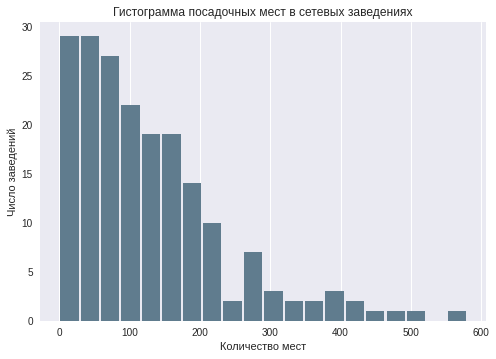

In [107]:
size, scale = 1000, 10
commutes = rest_number ['count_number']

commutes.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Гистограмма посадочных мест в сетевых заведениях')
plt.xlabel('Количество мест')
plt.ylabel('Число заведений')
plt.grid(axis='y', alpha=0.75)

In [108]:
# выведем список уникальных значений количества мест
rest_data_chain_y_number['number'].unique()

array([580, 500, 480, 456, 430, 428, 400, 398, 380, 356, 350, 343, 320,
       310, 306, 300, 284, 282, 280, 276, 275, 273, 266, 250, 240, 230,
       225, 224, 220, 218, 217, 215, 210, 206, 205, 200, 199, 198, 195,
       190, 189, 188, 186, 184, 180, 178, 176, 175, 174, 173, 170, 166,
       165, 164, 162, 160, 159, 158, 157, 156, 155, 154, 152, 150, 149,
       148, 146, 145, 144, 143, 140, 138, 136, 135, 133, 132, 131, 130,
       128, 125, 124, 123, 122, 120, 119, 118, 116, 115, 114, 110, 109,
       108, 106, 104, 102, 101, 100,  99,  98,  96,  95,  94,  93,  92,
        91,  90,  89,  88,  87,  86,  85,  84,  83,  82,  81,  80,  79,
        78,  76,  75,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,
        64,  63,  62,  61,  60,  58,  57,  56,  55,  54,  53,  52,  51,
        50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,
        37,  36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,
        24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  1

Количество уникальных значений велико и неудобно для анализа, но мы позаботились и заранее добавили в таблицу группировку по количеству мест. В данных видно, что значительную часть составляют заведения с нулевым количеством мест. Проверим что это: пропуск в данных, ошибка или достоверные данные.

In [109]:
# выведем на экран 
display(rest_data_chain_y_number.query('number==0'))

,id,object_name,chain,object_type,address,number
11990,180571,СТАРДОГS,да,предприятие быстрого обслуживания,"город Москва, проспект Андропова, дом 25А, стр...",0
12013,178174,ПИЦЦА ПАОЛО,да,предприятие быстрого обслуживания,"город Москва, Святоозерская улица, дом 1А",0
8893,148031,БУРГЕР КИНГ,да,предприятие быстрого обслуживания,"город Московский, улица Хабарова, дом 2",0
15217,214146,МАКДОНАЛДС,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
11997,187763,КОФЕ С СОБОЙ,да,предприятие быстрого обслуживания,"город Москва, Сходненская улица, дом 37",0
...,...,...,...,...,...,...
15122,213380,КРОШКА КАРТОШКА,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 87Б",0
11955,130252,КЕБАБ ХАУС,да,кафе,"город Москва, Ореховый бульвар, дом 14, корпус 3",0
15119,219044,КРОШКА КАРТОШКА,да,кафе,"город Москва, улица Вавилова, дом 3",0
15118,210329,КРОШКА КАРТОШКА,да,предприятие быстрого обслуживания,"город Москва, поселение Московский, Киевское ш...",0


Проверим выборочно в интернете, какие заведения не имеют посадочных мест:

* Пицца Паоло - Предлагаемые варианты: Еда навынос · Доставка

* Крошка Картошка - Предлагаемые варианты: Еда в заведении · Еда навынос · Доставка
Находится в: ТДЦ Варшавский

* Кебаб Хаус - Предлагаемые варианты: Еда в заведении · Еда навынос · Доставка
Находится в: ТЦ Домодедовский

Делаем вывод, что не имеют посадочных мест заведения с доставкой еды и торгующие на вынос. 

In [110]:
# сохраним в переменной rest_data_gr необходимые данные по всем объектам
rest_data_gr = rest_data[['id','type_namber']].groupby(by=["type_namber"]).count().reset_index().rename(columns={'id':'total'})
# выведем на экран 
print(rest_data_gr)

           type_namber  total
0            более 400   1566
1  нет посадочных мест   1621
2           от 1 до 10   1199
3          от 10 до 50   5822
4        от 150 до 400   1362
5         от 50 до 150   3796


In [111]:
# построим график
labels = rest_data_gr['type_namber']
values = rest_data_gr['total']

fig = go.Figure(data=[go.Pie(labels=labels, values=values
                    ,title='Распределение объектов общественного питания по числу посадочных мест')])
fig.show()

In [112]:
# для сетевых заведений сохраним в переменной rest_data_gr_ch необходимые данные

rest_data_gr_ch = rest_data.query('chain=="да"')[['id','type_namber']].\
groupby(by=["type_namber"]).count().reset_index().rename(columns={'id':'total'})
# выведем на экран
print(rest_data_gr_ch)

           type_namber  total
0            более 400    323
1  нет посадочных мест    268
2           от 1 до 10    220
3          от 10 до 50   1176
4        от 150 до 400    148
5         от 50 до 150    833


In [113]:
# построим график
labels = rest_data_gr_ch['type_namber']
values = rest_data_gr_ch['total']

fig = go.Figure(data=[go.Pie(labels=labels, values=values
             ,title='Распределение сетевых объектов общественного питания по числу посадочных мест')])
fig.show()

*Промежуточный вывод*

 В результате исследования:"Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?", установлено:
* более 9% объектов  не имеют посадочных мест, а работают с доставкой или на выдачу;
* наиболее распространены предприятия с небольшим кодичеством посадочных мест от 10 до 50- 39,6 %;
* доля сетевых предприятий с количеством мест более 400 составляет 10,9%.  

Подобное соотношение характерно не только для сетевых заведений, но и для предприятий общественного питания в целом.


In [114]:
# посчитаем количество заведений в сетях
pd.pivot_table(rest_data_chain_y,values='id',index=['object_name'],aggfunc='count')\
.query('id>1').sort_values(by='id')

,id
object_name,
КОФЕЙНЯ «КОФЕ ХАУС»,2
МИ ПЬЯЧЕ,2
МАГНОЛИЯ,2
КРЕПЕРИ ДЕ ПАРИ,2
КОФЕТУН,2
...,...
ТЕРЕМОК,94
БУРГЕР КИНГ,137
МАКДОНАЛДС,151


In [115]:
# посчитаем число заведений и среднее число посадочных мест  в заведениях  сетей
pd.pivot_table(rest_data_chain_y,values=['id','number'],index=['object_name']
               ,aggfunc={'id':'count','number':np.mean}).query('id>1').sort_values(by='number')


,id,number
object_name,,
ПРЕДПРИЯТИЕ БЫСТРОГО ОБСЛУЖИВАНИЯ «МИЛТИ»,3,0.000000
WOKKER,2,0.000000
МАГАЗИН ГОТОВОЙ ЕДЫ «МИЛТИ»,3,0.000000
MY BOX,2,0.000000
ТОЧКА ПРОДАЖИ ГОТОВОЙ ЕДЫ МИЛТИ,2,0.000000
...,...,...
КАФЕ ПРОНТО,3,211.000000
СТАРИНА МЮЛЛЕР СТАРИНА МИЛЛЕР,2,215.000000
ТЕМПЛ БАР,3,216.666667


In [116]:
# определим основные параметры в данных колонок
pd.pivot_table(rest_data_chain_y,values=['id','number'],index=['object_name']
               ,aggfunc={'id':'count','number':np.mean}).query('id>1').describe()


,id,number
count,246.000000,246.000000
mean,10.719512,59.390484
std,22.680536,49.547694
min,2.000000,0.000000
25%,2.000000,21.125000
50%,4.000000,44.000000
75%,7.000000,85.000000
max,157.000000,258.666667


Для создания групп определим критерий 
* для количества заведений: для малого количества min: от 0 до 50 %, для большого количества: от 75% до max, остальное -золотая середина

* для количества мест: для малого количества min  от 0 до 25%, для большого количества: от 75% до max, остальное -золотая середина


In [117]:
# сохраним необходимые данные в переменной rest_data_chain_y_grupuped
rest_data_chain_y_grupuped = pd.pivot_table(rest_data_chain_y,values=['id','number'],index=['object_name']
               ,aggfunc={'id':'count','number':np.mean}).query('id>1').reset_index()
print(rest_data_chain_y_grupuped.head())

          object_name  id     number
0          BOCCONCINO   3  66.666667
1         BURGER CLUB   3  20.333333
2  COFFEESHOP COMPANY   4  47.250000
3               COFIX  25   9.600000
4             CORREAS   3  44.000000


In [118]:
# разделим на группы сетевые заведения по количеству заведений в сети
rest_data_chain_y_grupuped['id_group'] =pd.cut(rest_data_chain_y_grupuped['id'],
       bins=[0, 4, 7,157],right=False)
# разделим на группы сетевые заведения по среднему количеству мест в заведениях сети
rest_data_chain_y_grupuped['number_group'] =pd.cut(rest_data_chain_y_grupuped['number'],
       bins=[0, 21, 85,258],right=False)
# выведем на экран первые 5 строк
print(rest_data_chain_y_grupuped.head())



          object_name  id     number  id_group number_group
0          BOCCONCINO   3  66.666667    [0, 4)     [21, 85)
1         BURGER CLUB   3  20.333333    [0, 4)      [0, 21)
2  COFFEESHOP COMPANY   4  47.250000    [4, 7)     [21, 85)
3               COFIX  25   9.600000  [7, 157)      [0, 21)
4             CORREAS   3  44.000000    [0, 4)     [21, 85)


In [119]:
# постчитаем количество сетей в группах
rest_data_chain_y_grupuped_id = rest_data_chain_y_grupuped[['object_name','id_group']]\
.groupby(by=['id_group']).count().reset_index()
# выведем на экран
print(rest_data_chain_y_grupuped_id)

   id_group  object_name
0    [0, 4)          122
1    [4, 7)           55
2  [7, 157)           68


In [120]:
# постчитаем количество сетей в группах
rest_data_chain_y_grupuped_number = rest_data_chain_y_grupuped[['object_name','number_group']]\
.groupby(by=['number_group']).count().reset_index()
# выведем на экран
print(rest_data_chain_y_grupuped_number.head())

  number_group  object_name
0      [0, 21)           60
1     [21, 85)          122
2    [85, 258)           63


*Промежуточный вывод

Большинство сетей имеют до 4 заведений  и количество мест от 21 до 85.

In [121]:
# Код ревьюера

rest_data_chain_y_grupuped[['id_group','number_group']].value_counts()

id_group  number_group
[0, 4)    [21, 85)        59
[7, 157)  [21, 85)        35
[0, 4)    [85, 258)       33
          [0, 21)         29
[4, 7)    [21, 85)        27
[7, 157)  [0, 21)         17
          [85, 258)       16
[4, 7)    [0, 21)         14
          [85, 258)       14
dtype: int64

## Определение для каждого вида объекта общественного питания  среднего количества посадочных мест. Построение графика.Поиск вида заведения, которое предоставляет в среднем самое большое количество посадочных мест.  

In [122]:
# сохраним в переменной rest_data_mean_number необходимые данные по видам заведений
rest_data_mean_number = rest_data[['id', 'object_type', 'number']]\
.groupby('object_type', as_index=False)\
.agg({'id': 'count','number': 'median'}).sort_values('number', ascending=False)

# выведем на экран 
print(rest_data_mean_number)

                         object_type    id  number
8                           столовая  2587     103
7                           ресторан  2285      80
0                                бар   856      35
1                              буфет   585      32
3                               кафе  6099      30
4                          кафетерий   398       6
6  предприятие быстрого обслуживания  1923       5
2                         закусочная   360       0
5          магазин (отдел кулинарии)   273       0


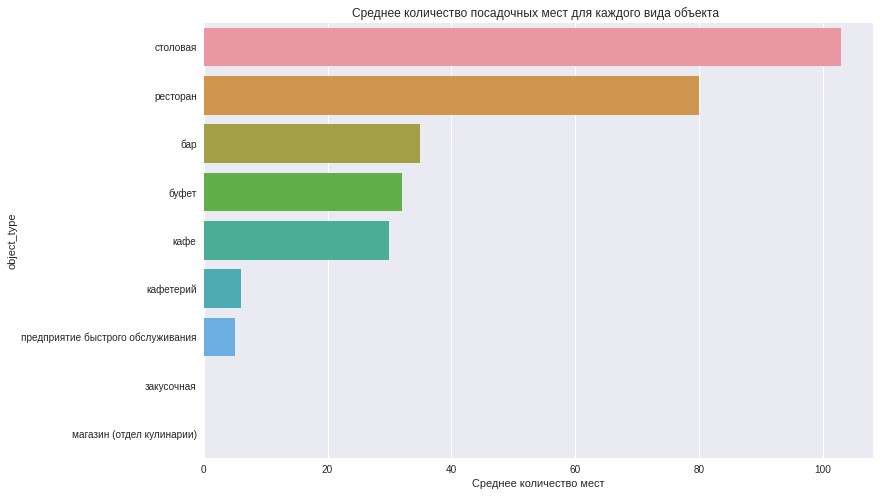

In [123]:
#построим график среднего количества мест для каждого вида 
plt.figure(figsize=(12, 8))

# задание параметров построения графика
ax = sns.barplot(y=rest_data_mean_number.object_type,
                 x=rest_data_mean_number.number)
                 
                 

# подписи осей и названия
plt.xlabel('Среднее количество мест')
plt.title('Среднее количество посадочных мест для каждого вида объекта  ');

*Промежуточный вывод*

 В результате исследования   "Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?", установлено, что  наиболшее количество посадочных мест предоставляют столовые -103 мест, за ними следуют рестораны-80 мест и бары-35 мест, замыкают рейтинг предприятия быстрого обслуживанияс небольшим количеством посадочных мест равным 5. В магазинах(отделах кулинарии) и закусочных среднее количество посадочных мест равно нулю.


## Выделение в отдельный столбец информации об улице из столбца address . Построение графика топ-10 улиц по количеству объектов общественного питания. Поиск внешней информацией и ответа на вопрос — в каких районах Москвы находятся эти улицы?

In [124]:
# выведем на экран первые 5 строк
print(rest_data['address'].head())

0           город Москва, улица Егора Абакумова, дом 9
1    город Москва, улица Талалихина, дом 2/1, корпус 1
2            город Москва, Абельмановская улица, дом 6
3              город Москва, Абрамцевская улица, дом 1
4    город Москва, Абрамцевская улица, дом 9, корпус 1
Name: address, dtype: object


In [125]:
# выделим в отдельный столбец название улиц
pattern = '\,*,(([а-яА-Я1-9\-ё\s"]+)?(улица|переулок|шоссе|проспект|площадь|проезд|\
село|Проезд|аллея|бульвар|набережная|тупик|линия|)([а-яА-Яё1-9\-\s"]+)?)\,'
rest_data['street'] = rest_data['address'].str.extract(pat = pattern)[0]
# выведем на экран первые 5 строк
display(rest_data.head())

,id,object_name,chain,object_type,address,number,type_namber,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,от 10 до 50,улица Егора Абакумова
1,77874,РОДНИК,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,от 10 до 50,улица Талалихина
2,24309,КАФЕ «АКАДЕМИЯ»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,от 50 до 150,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,от 10 до 50,Абрамцевская улица
4,119365,КАФЕ «ВИШНЕВАЯ МЕТЕЛЬ»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,более 400,Абрамцевская улица


In [127]:
#сохраним в переменной необходимые данные
rest_data_street = rest_data[['id',  'street']]\
.groupby('street', as_index=False)\
.agg({'id': 'count'}).sort_values('id', ascending=False)

# выведем на экран первые 10 строк
print(rest_data_street.head(10))

                       street   id
1329         город Зеленоград  232
1430            проспект Мира  204
990         Профсоюзная улица  182
680    Ленинградский проспект  171
976    Пресненская набережная  167
404          Варшавское шоссе  161
683        Ленинский проспект  147
1401      поселение Сосенское  138
1427     проспект Вернадского  132
671      Кутузовский проспект  114


В полученном рейтинге город Зеленоград и поселение Сосенское удалим, т.к они не являются улицами и , скорее всего, в рейтинг попало количество всех заведений этих населённых пунктов и для целей нашего анализа они не нужны.

In [128]:
# удалим город Зеленоград  поселение Сосенское из списка улиц
rest_data_street_select = rest_data_street.drop([1329,1401])
# сохраним в переменной rest_data_street_select_ten первые 10 улиц
rest_data_street_select_ten = rest_data_street_select[:10]
# выведем на экран 
print(rest_data_street_select_ten)


                       street   id
1430            проспект Мира  204
990         Профсоюзная улица  182
680    Ленинградский проспект  171
976    Пресненская набережная  167
404          Варшавское шоссе  161
683        Ленинский проспект  147
1427     проспект Вернадского  132
671      Кутузовский проспект  114
597           Каширское шоссе  112
602      Кировоградская улица  110


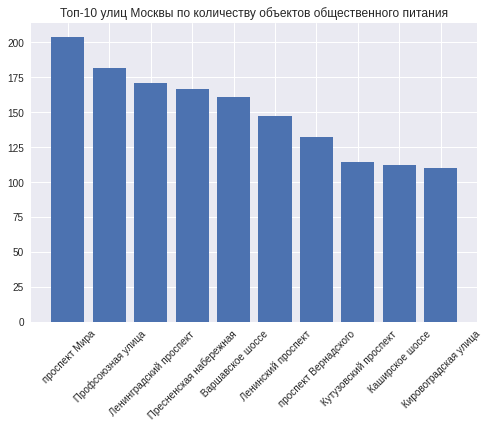

In [129]:
# построим график
plt.style.use('seaborn')
plt.bar(rest_data_street_select_ten['street'],rest_data_street_select_ten['id'])
plt.title('Топ-10 улиц Москвы по количеству объектов общественного питания')
plt.xticks(rotation=45)
plt.show()

Для ответа на вопрос — "в каких районах Москвы находятся эти улицы?" найдем информацию об улицах и районах города Москва во внешнем источнике.

In [130]:
from io import BytesIO
import pandas as pd
import numpy as np
import requests
r = requests.get('https://docs.google.com/spreadsheets/d/16QHtZVH5eS1b6ukXS8QFLmKCjLB6GqxZUIQpvMyRDsY/export?format=csv')
data_msk = pd.read_csv(BytesIO(r.content))
data_msk.head()

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


In [131]:
# выведем общую информацию
data_msk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   streetname  4398 non-null   object
 1   areaid      4398 non-null   int64 
 2   okrug       4398 non-null   object
 3   area        4398 non-null   object
dtypes: int64(1), object(3)
memory usage: 137.6+ KB


In [132]:
# проверим дубликаты
data_msk.duplicated().sum()

8

In [133]:
# удалим дубликаты
data_msk = data_msk.drop_duplicates()
# проверим дубликаты
data_msk.duplicated().sum()


0

Для каждой улицы определим в помощью внешних данных, список районов, по которым она проходит.

In [134]:
# определим список районов проспект Мира
pr_mira = data_msk["streetname"].str.contains('проспект Мира')
res_one = data_msk.loc[pr_mira]
# выведем на экран 
print(res_one)

         streetname  areaid okrug                area
2293  проспект Мира      70  СВАО  Алексеевский район
2390  проспект Мира      86  СВАО   Ярославский Район
2531  проспект Мира      78  СВАО  Район Марьина роща
2578  проспект Мира      79  СВАО  Останкинский район
2644  проспект Мира      81  СВАО     Район Ростокино
2712  проспект Мира      82  СВАО      Район Свиблово
4334  проспект Мира      16   ЦАО     Мещанский район


In [135]:
# определим список районов Профсоюзная улица
prof_ul = data_msk["streetname"].str.contains('Профсоюзная улица')
res_too = data_msk.loc[prof_ul]
# выведем на экран 
print(res_too)

             streetname  areaid okrug                 area
3845  Профсоюзная улица     123  ЮЗАО  Академический район
3867  Профсоюзная улица     132  ЮЗАО      Район Черемушки
3916  Профсоюзная улица     134  ЮЗАО        Район Ясенево
3948  Профсоюзная улица     126  ЮЗАО       Район Коньково
3996  Профсоюзная улица     129  ЮЗАО    Обручевский район
4024  Профсоюзная улица     131  ЮЗАО    Район Теплый Стан


In [136]:
# определим список районов Ленинградский проспект
len_pr = data_msk["streetname"].str.contains('Ленинградский проспект')
res_three = data_msk.loc[len_pr]
# выведем на экран 
print(res_three)

                  streetname  areaid okrug               area
1857  Ленинградский проспект      54   САО     Район Аэропорт
1896  Ленинградский проспект      55   САО      Район Беговой
1992  Ленинградский проспект      69   САО  Хорошевский район
2150  Ленинградский проспект      66   САО        Район Сокол


In [137]:
# определим список районов Пресненская набережная
pres_nab = data_msk["streetname"].str.contains('Пресненская набережная')
res_four = data_msk.loc[pres_nab]
# выведем на экран 
print(res_four)

                streetname  areaid okrug               area
72  Пресненская набережная      17   ЦАО  Пресненский район


In [138]:
# определим список районов Варшавское шоссе
var_sh = data_msk["streetname"].str.contains('Варшавское шоссе')
res_five = data_msk.loc[var_sh]
# выведем на экран 
print(res_five)

            streetname  areaid okrug                         area
3105  Варшавское шоссе     109   ЮАО  Район Чертаново Центральное
3117  Варшавское шоссе     108   ЮАО     Район Чертаново Северное
3125  Варшавское шоссе     110   ЮАО        Район Чертаново Южное
3241  Варшавское шоссе      99   ЮАО                Донской район
3305  Варшавское шоссе     102   ЮАО     Район Нагатино-Садовники
3349  Варшавское шоссе     104   ЮАО               Нагорный район
3999  Варшавское шоссе     130  ЮЗАО        Район Северное Бутово
4065  Варшавское шоссе     133  ЮЗАО           Район Южное Бутово


In [139]:
# определим список районов Ленинский проспект
lenin_pr = data_msk["streetname"].str.contains('Ленинский проспект')
res_six = data_msk.loc[lenin_pr]
# выведем на экран 
print(res_six)

              streetname  areaid okrug                        area
1504  Ленинский проспект      44   ЗАО  Район Проспект Вернадского
1602  Ленинский проспект      47   ЗАО    Район Тропарево-Никулино
3260  Ленинский проспект      99   ЮАО               Донской район
3886  Ленинский проспект     124  ЮЗАО           Район Гагаринский
3973  Ленинский проспект     128  ЮЗАО         Ломоносовский район
3986  Ленинский проспект     129  ЮЗАО           Обручевский район
4021  Ленинский проспект     131  ЮЗАО           Район Теплый Стан
4163  Ленинский проспект      21   ЦАО              Район Якиманка


In [140]:
# определим список районов проспект Вернадского
pr_vern = data_msk["streetname"].str.contains('проспект Вернадского')
res_seven = data_msk.loc[pr_vern]
# выведем на экран 
print(res_seven)

                streetname  areaid okrug                        area
1501  проспект Вернадского      44   ЗАО  Район Проспект Вернадского
1510  проспект Вернадского      45   ЗАО               Район Раменки
1598  проспект Вернадского      47   ЗАО    Район Тропарево-Никулино
3878  проспект Вернадского     124  ЮЗАО           Район Гагаринский
3967  проспект Вернадского     128  ЮЗАО         Ломоносовский район


In [141]:
# определим список районов Кутузовский проспект
kut_pr = data_msk["streetname"].str.contains('Кутузовский проспект')
res_eight = data_msk.loc[kut_pr]
# выведем на экран 
print(res_eight)

                streetname  areaid okrug                  area
1208  Кутузовский проспект      38   ЗАО    Район Дорогомилово
1280  Кутузовский проспект      49   ЗАО  Район Фили-Давыдково


In [142]:
# определим список районов Каширское шоссе
kash_sh = data_msk["streetname"].str.contains('Каширское шоссе')
res_nine = data_msk.loc[kash_sh]
# выведем на экран 
print(res_nine)

           streetname  areaid okrug                             area
3292  Каширское шоссе     101   ЮАО       Район Москворечье-Сабурово
3308  Каширское шоссе     102   ЮАО         Район Нагатино-Садовники
3369  Каширское шоссе     106   ЮАО     Район Орехово-Борисово Южное
3392  Каширское шоссе     105   ЮАО  Район Орехово-Борисово Северное


In [143]:
# определим список районов Кировоградская улица
kir_ul = data_msk["streetname"].str.contains('Кировоградская улица')
res_ten = data_msk.loc[kir_ul]
# выведем на экран 
print(res_ten)

                streetname  areaid okrug                         area
3111  Кировоградская улица     109   ЮАО  Район Чертаново Центральное
3120  Кировоградская улица     108   ЮАО     Район Чертаново Северное
3131  Кировоградская улица     110   ЮАО        Район Чертаново Южное


In [144]:
# сохраним в переменной все полученные списки
res_ouer = res_one.append(res_too).append(res_three).append(res_four).append(res_five)\
.append(res_six).append(res_seven).append(res_eight).append(res_nine).append(res_ten)
# выведем на экран
print(res_ouer)

                  streetname  areaid okrug                             area
2293           проспект Мира      70  СВАО               Алексеевский район
2390           проспект Мира      86  СВАО                Ярославский Район
2531           проспект Мира      78  СВАО               Район Марьина роща
2578           проспект Мира      79  СВАО               Останкинский район
2644           проспект Мира      81  СВАО                  Район Ростокино
2712           проспект Мира      82  СВАО                   Район Свиблово
4334           проспект Мира      16   ЦАО                  Мещанский район
3845       Профсоюзная улица     123  ЮЗАО              Академический район
3867       Профсоюзная улица     132  ЮЗАО                  Район Черемушки
3916       Профсоюзная улица     134  ЮЗАО                    Район Ясенево
3948       Профсоюзная улица     126  ЮЗАО                   Район Коньково
3996       Профсоюзная улица     129  ЮЗАО                Обручевский район
4024       П

In [145]:
# сохраним в переменной res_ouer_area список районов с улицами топ 10
res_ouer_area = res_ouer['area'].unique()
# выведем на экран список
print(res_ouer_area)
# выведем на экран количество районов
print('Количество районов с улицами вошедшими в топ 10:',len(res_ouer_area))

['Алексеевский район' 'Ярославский Район' 'Район Марьина роща'
 'Останкинский район' 'Район Ростокино' 'Район Свиблово' 'Мещанский район'
 'Академический район' 'Район Черемушки' 'Район Ясенево' 'Район Коньково'
 'Обручевский район' 'Район Теплый Стан' 'Район Аэропорт' 'Район Беговой'
 'Хорошевский район' 'Район Сокол' 'Пресненский район'
 'Район Чертаново Центральное' 'Район Чертаново Северное'
 'Район Чертаново Южное' 'Донской район' 'Район Нагатино-Садовники'
 'Нагорный район' 'Район Северное Бутово' 'Район Южное Бутово'
 'Район Проспект Вернадского' 'Район Тропарево-Никулино'
 'Район Гагаринский' 'Ломоносовский район' 'Район Якиманка'
 'Район Раменки' 'Район Дорогомилово' 'Район Фили-Давыдково'
 'Район Москворечье-Сабурово' 'Район Орехово-Борисово Южное'
 'Район Орехово-Борисово Северное']
Количество районов с улицами вошедшими в топ 10: 37


*Промежуточный вывод*

В топ 10 улиц с наибольшим количеством заведений питания вошли центральные улицы и проспекты с большой пртяжённостью преимущественно в пределах МКАД (по данным https://yandex.ru/maps). Эти улицы протянулись по территории 37 районов Москвы.

## Поиск числа улиц с одним объектом общественного питания. Поиск внешней информации и ответ на вопрос — в каких районах Москвы находятся эти улицы? 

In [146]:
# сохраним в переменной rest_data_street число улиц с одним объектом общественного питания
rest_data_street = rest_data[['id',  'street']]\
.groupby('street', as_index=False)\
.agg({'id': 'count'}).sort_values('id', ascending=True)
# выведем на экран 
print('число улиц с одним объектом общественного питания:',rest_data_street.query('id==1').count())

число улиц с одним объектом общественного питания: street    557
id        557
dtype: int64


In [147]:
#сохраним список уникальных значений улиц  
spisok = rest_data_street.query('id==1')['street'].unique()
# выведем на экран 
print(spisok)

[' Песчаная улица' ' дом 22' ' Ижорский проезд' ' Изваринская улица'
 ' Известковый переулок' ' Измайловская площадь' ' дом 19' ' дом 18'
 ' дом 16' ' дом 11А' ' Икшинская улица' ' дом 118Б' ' дом 1'
 ' Институтский переулок' ' Интернациональная улица' ' деревня Столбово'
 ' деревня Сенькино-Секерино' ' деревня Дудкино' ' Иваньковское шоссе'
 ' дом 23' ' Зюзинская улица' ' Зубарев переулок' ' переулок Расковой'
 ' переулок Маяковского' ' Есенинский бульвар' ' Живарев переулок'
 ' переулок Красина' ' Жигулёвская улица' ' переулок Васнецова'
 ' Жуков проезд' ' Калибровская улица' ' домовладение 11' ' дом 8'
 ' дом 46' ' Зарайская улица' ' дом 39' ' Звонарский переулок' ' дом 37'
 ' дом 3' ' дом 28' ' Заводской проезд' ' переулок Хользунова'
 ' Калошин переулок' ' владение 2Б' ' Конаковский проезд'
 ' Кондрашёвский тупик' ' Черницынский проезд' ' Кооперативная улица'
 ' Черниговский переулок' ' Коптевский бульвар' ' Чермянский проезд'
 ' Чермянская улица' ' Челюскинская улица' ' Костомаро

In [148]:
# обработаем список, удалив лишние пробелы и разделив запятыми
spisok = [x.strip(' ') for x in spisok]
# выведем на экран 
print(spisok)

['Песчаная улица', 'дом 22', 'Ижорский проезд', 'Изваринская улица', 'Известковый переулок', 'Измайловская площадь', 'дом 19', 'дом 18', 'дом 16', 'дом 11А', 'Икшинская улица', 'дом 118Б', 'дом 1', 'Институтский переулок', 'Интернациональная улица', 'деревня Столбово', 'деревня Сенькино-Секерино', 'деревня Дудкино', 'Иваньковское шоссе', 'дом 23', 'Зюзинская улица', 'Зубарев переулок', 'переулок Расковой', 'переулок Маяковского', 'Есенинский бульвар', 'Живарев переулок', 'переулок Красина', 'Жигулёвская улица', 'переулок Васнецова', 'Жуков проезд', 'Калибровская улица', 'домовладение 11', 'дом 8', 'дом 46', 'Зарайская улица', 'дом 39', 'Звонарский переулок', 'дом 37', 'дом 3', 'дом 28', 'Заводской проезд', 'переулок Хользунова', 'Калошин переулок', 'владение 2Б', 'Конаковский проезд', 'Кондрашёвский тупик', 'Черницынский проезд', 'Кооперативная улица', 'Черниговский переулок', 'Коптевский бульвар', 'Чермянский проезд', 'Чермянская улица', 'Челюскинская улица', 'Костомаровская набережна

Полученных список сравним с внешними данными мосгаза и узнаем в каких районах находятся наши улицы

In [149]:
# список районов Москви по которым проходят улицы с с одним объектом общественного питания
data_msk_spisok = data_msk.query('streetname in @spisok').sort_values(by='area')  
# сохраним список в переменной data_msk_spisok_area
data_msk_spisok_area = data_msk_spisok['area'].unique()
# выведем на экран 
print(data_msk_spisok_area)

['Алексеевский район' 'Алтуфьевский район' 'Бабушкинский район'
 'Басманный район' 'Бескудниковский Район' 'Бутырский район'
 'Войковский Район' 'Головинский район' 'Даниловский район'
 'Дмитровский район' 'Донской район' 'Красносельский район'
 'Лосиноостровский район' 'Мещанский район' 'Можайский Район'
 'Молжаниновский район' 'Нагорный район' 'Нижегородский район'
 'Обручевский район' 'Останкинский район' 'Пресненский район'
 'Район Арбат' 'Район Аэропорт' 'Район Беговой' 'Район Бирюлево Восточное'
 'Район Богородское' 'Район Внуково' 'Район Восточное Измайлово'
 'Район Восточный' 'Район Выхино-Жулебино' 'Район Гагаринский'
 'Район Гольяново' 'Район Дорогомилово' 'Район Замоскворечье'
 'Район Западное Дегунино' 'Район Зюзино' 'Район Ивановское'
 'Район Измайлово' 'Район Коньково' 'Район Коптево'
 'Район Косино-Ухтомский' 'Район Котловка' 'Район Кузьминки'
 'Район Кунцево' 'Район Куркино' 'Район Левобережный' 'Район Лефортово'
 'Район Люблино' 'Район Марфино' 'Район Марьина роща' 'Ра

In [150]:
# выведем на экран 
print('районов Москвы, по которым проходят улицы с с одним объектом общественного питания:'
      ,len(data_msk_spisok_area))
# выведем на экран 
print ('районов в Москве всего :',len(data_msk['area'].unique()))


районов Москвы, по которым проходят улицы с с одним объектом общественного питания: 99
районов в Москве всего : 123


Определим какие районы входят в оба списка . 

In [151]:
# сохраним в переменной area список районов, вошедших в оба списка
area = c = list(set(res_ouer_area) & set(data_msk_spisok_area))
# выведем на экран
print(pd.Series(area))

0             Район Южное Бутово
1          Район Северное Бутово
2     Район Москворечье-Сабурово
3                 Район Коньково
4              Хорошевский район
5                 Район Свиблово
6              Обручевский район
7                  Район Беговой
8              Пресненский район
9                  Район Ясенево
10      Район Нагатино-Садовники
11                Район Якиманка
12             Ярославский Район
13                Район Аэропорт
14                 Район Раменки
15            Алексеевский район
16      Район Чертаново Северное
17            Район Дорогомилово
18                   Район Сокол
19             Район Гагаринский
20         Район Чертаново Южное
21               Район Черемушки
22          Район Фили-Давыдково
23                Нагорный район
24               Район Ростокино
25               Мещанский район
26            Останкинский район
27                 Донской район
28            Район Марьина роща
dtype: object


*Промежуточный вывод*

Количество улиц с одним объектом питания составляет 557. Выборочная проверка местоположения  на карте г.Москва показала, что большинство этих улиц находится либо вдали от центра ,либо в  районах промзон,скверов, аэропортов или в спальных районах. Сравнив список районов с топом 10 улиц и список районов с одним объектом питания, обнаружено совпадение в 28 случаях. При этом оличество районов с топом 10 улиц составляет 37, а количетво районов улиц с одним объектом - 99 . Таким образом более 75% топовых районов включают в себя и улицы с одним объектом питания, и лишь по 28% районов с одним объектом проходят топовые улицы.

# Общий вывод и  рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Комментарий возможность развития сети.¶

Работа над проектом включила в себя:
* предобработку данных;
* анализ полученных данных с использованием методов визуализации и с привлечением информациии из внешних источников;
* выводы и рекомендации.

На основании исследований проведённых в ходе работы установлено.

* Соотношения видов объектов общественного питания по количеству следующее:подавляющее большинство объектов 39,7 % относятся к кафе, следующий в рейтинге -столовые 16,8 %, рестораны третьи по количеству-14,9%, предприятие быстрого обслуживания -12,5%. Доли остальных заведений не превышают 7%.

* Соотношения сетевых и несетевых заведений по количеству: 80,7 % не являются сетевыми, доля сетевых заведений составляет 19,3%.


* Характер сетевого распространения для  объектов общественного питания следующий: 47 % относятся к кафе, доля сетевых предприятий быстрого обслуживания составляет 26,7%. Сетевые рестораны составляют 18,3 % от количества всех сетевых объектов питания, доли остальных типов заведений не превышают 2%. Существенное отличие от несетевых предприятий в части столовых- они в бодавляющем большинстве несетевые(0,1% среди сетевых предприятий против 20% среди несетевых).

* Среднее количество посадочных мест распределилось следующим образом: столовые -103 мест, за ними следуют рестораны-80 мест и бары-35 мест, замыкают рейтинг предприятия быстрого обслуживанияс небольшим количеством посадочных мест равным 5. В магазинах(отделах кулинарии) и закусочных среднее количество посадочных мест равно нулю.
.

* Топ-10 улиц по количеству объектов общественного питания включает в себя:
проспект Мира,  
Профсоюзная улица,  
Ленинградский проспект,  
Пресненская набережная,  
Варшавское шоссе,  
Ленинский проспект,  
проспект Вернадского,  
Кутузовский проспект,  
Каширское шоссе,  
Кировоградская улица.
Местоположение этих улиц в пределах МКАД . Это протяжённые крупные проспекты и улицы центра города.

* Количество улиц с одним объектом общественного питания составляет 557.Они протянулись по территории 99 районов. Большинство этих улиц находится либо далеко от центра, либо в промышленных или спальных районах Москвы.


Рекомендации относительно заведения:

заведение на первом этапе может не быть сетевым, но сеть вполне возможна по мере развития бизнеса

тип заведения :кафе или предприятие быстрого питания в случае выбора сетевого развития

количество посадочных мест- до 50

местоположение-в районе МКАД


   Презентация находится по адресу https://disk.yandex.ru/i/PqDfL1Py1VGNcg